In [ ]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import muon as mu
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Get the current directory
current_dir = os.getcwd()

# Define the data path
data_path = os.path.join(current_dir, 'data', 'GSE126074')

# Define the file paths
rna_counts_path = os.path.join(data_path, 'GSE126074_AdBrainCortex_SNAREseq_cDNA.counts.mtx.gz')
rna_barcodes_path = os.path.join(data_path, 'GSE126074_AdBrainCortex_SNAREseq_cDNA.barcodes.tsv.gz')
rna_genes_path = os.path.join(data_path, 'GSE126074_AdBrainCortex_SNAREseq_cDNA.genes.tsv.gz')

atac_counts_path = os.path.join(data_path, 'GSE126074_AdBrainCortex_SNAREseq_chromatin.counts.mtx.gz')
atac_barcodes_path = os.path.join(data_path, 'GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv.gz')
atac_peaks_path = os.path.join(data_path, 'GSE126074_AdBrainCortex_SNAREseq_chromatin.peaks.tsv.gz')

# Load scRNA-seq data
adata_rna = sc.read_mtx(rna_counts_path)
barcodes_rna = pd.read_csv(rna_barcodes_path, header=None, sep='\t')
genes_rna = pd.read_csv(rna_genes_path, header=None, sep='\t')

# Load scATAC-seq data
adata_atac = sc.read_mtx(atac_counts_path)
barcodes_atac = pd.read_csv(atac_barcodes_path, header=None, sep='\t')
peaks_atac = pd.read_csv(atac_peaks_path, header=None, sep='\t')

In [5]:
# Print the first few rows of the genes and peaks DataFrames to understand their structure
print("Genes DataFrame:")
print(genes_rna.head())
print("\nPeaks DataFrame:")
print(peaks_atac.head())

Genes DataFrame:
               0
0  0610005C13Rik
1  0610007P14Rik
2  0610009B22Rik
3  0610009E02Rik
4  0610009L18Rik

Peaks DataFrame:
                      0
0  chr1:3005833-3005982
1  chr1:3094772-3095489
2  chr1:3119556-3120739
3  chr1:3121334-3121696
4  chr1:3134637-3135032


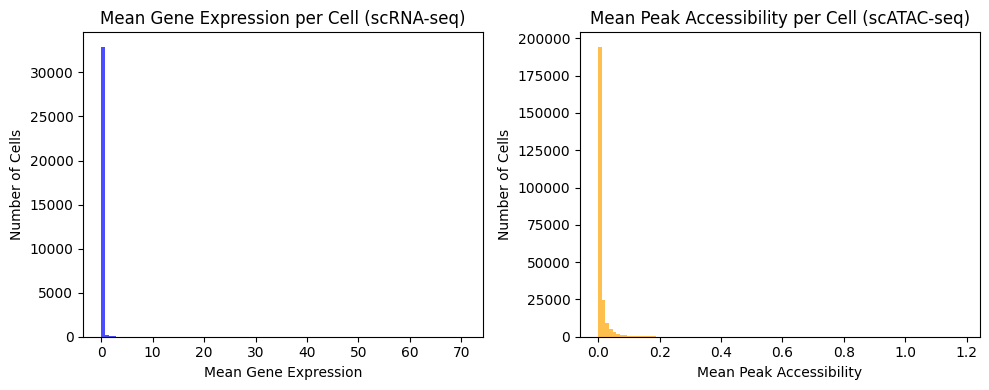

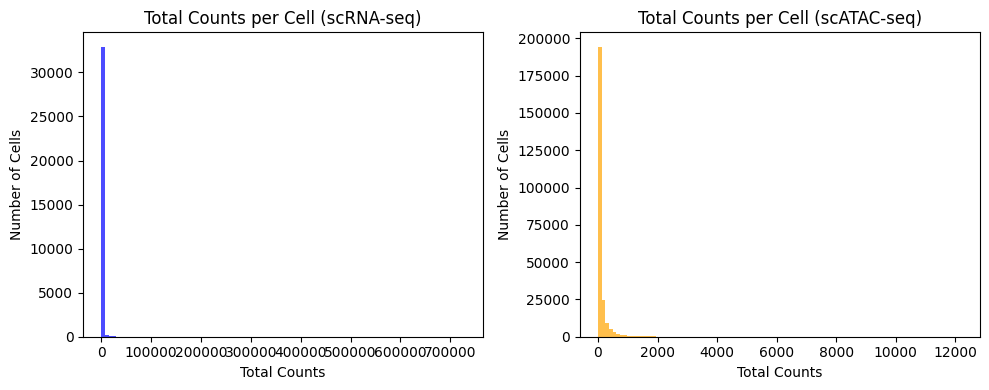

In [6]:
# Plot gene expression distributions for scRNA-seq data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(adata_rna.X.mean(axis=1), bins=100, alpha=0.7, color='blue')
plt.title('Mean Gene Expression per Cell (scRNA-seq)')
plt.xlabel('Mean Gene Expression')
plt.ylabel('Number of Cells')

# Plot peak accessibility distributions for scATAC-seq data
plt.subplot(1, 2, 2)
plt.hist(adata_atac.X.mean(axis=1), bins=100, alpha=0.7, color='orange')
plt.title('Mean Peak Accessibility per Cell (scATAC-seq)')
plt.xlabel('Mean Peak Accessibility')
plt.ylabel('Number of Cells')
plt.tight_layout()
plt.show()

# Plot total counts per cell for scRNA-seq data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(adata_rna.X.sum(axis=1), bins=100, alpha=0.7, color='blue')
plt.title('Total Counts per Cell (scRNA-seq)')
plt.xlabel('Total Counts')
plt.ylabel('Number of Cells')

# Plot total counts per cell for scATAC-seq data
plt.subplot(1, 2, 2)
plt.hist(adata_atac.X.sum(axis=1), bins=100, alpha=0.7, color='orange')
plt.title('Total Counts per Cell (scATAC-seq)')
plt.xlabel('Total Counts')
plt.ylabel('Number of Cells')
plt.tight_layout()
plt.show()

In [ ]:
# Log-transform the total counts for scRNA-seq data
adata_rna.obs['log_total_counts'] = np.log1p(adata_rna.X.sum(axis=1))

# Log-transform the total counts for scATAC-seq data
adata_atac.obs['log_total_counts'] = np.log1p(adata_atac.X.sum(axis=1))

# Plot histograms of log-transformed total counts
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(adata_rna.obs['log_total_counts'], bins=100, alpha=0.7, color='blue')
plt.title('Log-Transformed Total Counts per Cell (scRNA-seq)')
plt.xlabel('Log-Transformed Total Counts')
plt.ylabel('Number of Cells')

plt.subplot(1, 2, 2)
plt.hist(adata_atac.obs['log_total_counts'], bins=100, alpha=0.7, color='orange')
plt.title('Log-Transformed Total Counts per Cell (scATAC-seq)')
plt.xlabel('Log-Transformed Total Counts')
plt.ylabel('Number of Cells')
plt.tight_layout()
plt.show()

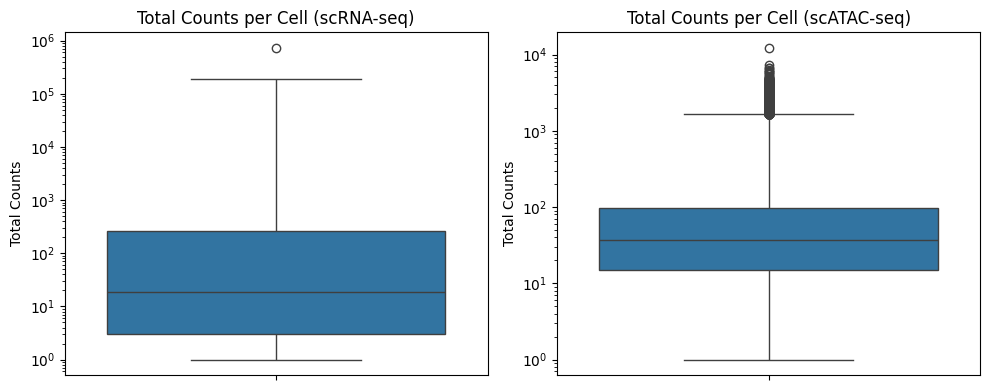

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total counts per cell for scRNA-seq data
adata_rna.obs['total_counts'] = adata_rna.X.sum(axis=1)

# Calculate total counts per cell for scATAC-seq data
adata_atac.obs['total_counts'] = adata_atac.X.sum(axis=1)

# Plot box plots for scRNA-seq data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=adata_rna.obs['total_counts'], log_scale=True)
plt.title('Total Counts per Cell (scRNA-seq)')
plt.ylabel('Total Counts')

# Plot box plots for scATAC-seq data
plt.subplot(1, 2, 2)
sns.boxplot(y=adata_atac.obs['total_counts'], log_scale=True)
plt.title('Total Counts per Cell (scATAC-seq)')
plt.ylabel('Total Counts')
plt.tight_layout()
plt.show()

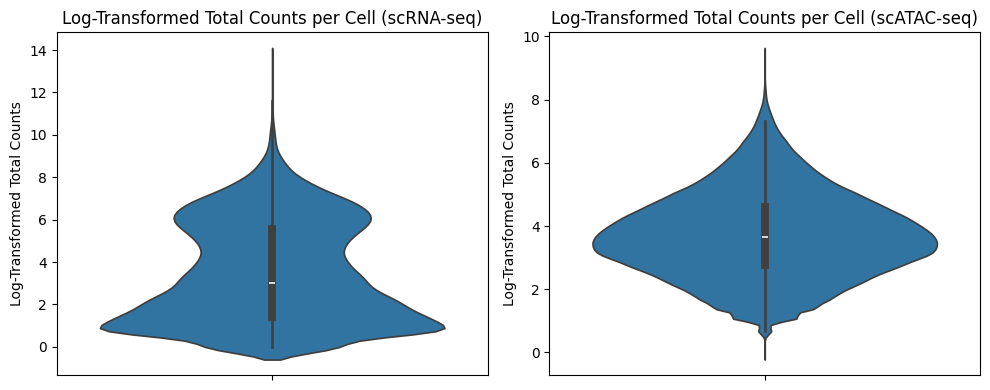

In [ ]:
# Calculate total counts per cell for scRNA-seq data
adata_rna.obs['total_counts'] = adata_rna.X.sum(axis=1)

# Calculate total counts per cell for scATAC-seq data
adata_atac.obs['total_counts'] = adata_atac.X.sum(axis=1)

# Log-transform the total counts and remove infs and NaNs
adata_rna.obs['log_total_counts'] = np.log1p(adata_rna.obs['total_counts']).replace([np.inf, -np.inf], np.nan).dropna()
adata_atac.obs['log_total_counts'] = np.log1p(adata_atac.obs['total_counts']).replace([np.inf, -np.inf], np.nan).dropna()

# Plot violin plots for scRNA-seq data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.violinplot(y=adata_rna.obs['log_total_counts'])
plt.title('Log-Transformed Total Counts per Cell (scRNA-seq)')
plt.ylabel('Log-Transformed Total Counts')

# Plot violin plots for scATAC-seq data
plt.subplot(1, 2, 2)
sns.violinplot(y=adata_atac.obs['log_total_counts'])
plt.title('Log-Transformed Total Counts per Cell (scATAC-seq)')
plt.ylabel('Log-Transformed Total Counts')
plt.tight_layout()
plt.show()

In [4]:
# Ensure the data is correctly oriented
if adata_rna.shape[0] != len(barcodes_rna):
    adata_rna = adata_rna.T
if adata_atac.shape[0] != len(barcodes_atac):
    adata_atac = adata_atac.T

In [5]:
# Create AnnData objects
adata_rna.obs_names = barcodes_rna[0].values
adata_rna.var_names = genes_rna[0].values

adata_atac.obs_names = barcodes_atac[0].values
adata_atac.var_names = peaks_atac[0].values

In [6]:
# Ensure barcodes match between scRNA-seq and scATAC-seq
common_barcodes = adata_rna.obs_names.intersection(adata_atac.obs_names)
adata_rna = adata_rna[adata_rna.obs_names.isin(common_barcodes), :].copy()  # Create a copy
adata_atac = adata_atac[adata_atac.obs_names.isin(common_barcodes), :].copy()  # Create a copy

# Create a MuData object for multi-omics analysis
mdata = mu.MuData({'rna': adata_rna, 'atac': adata_atac})

a:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\mudata\_core\mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
a:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\mudata\_core\mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [7]:
# Perform multi-omics analysis
mu.pp.intersect_obs(mdata)

a:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\mudata\_core\mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [8]:
# Apply scanpy preprocessing functions to each modality
for modality in mdata.mod.keys():
    sc.pp.log1p(mdata[modality])
    sc.pp.scale(mdata[modality], max_value=10)
    sc.pp.pca(mdata[modality], svd_solver='arpack')
    sc.pp.neighbors(mdata[modality], n_neighbors=10, n_pcs=40)

In [10]:
# Ensure neighbors are computed for the integrated data
mu.pp.neighbors(mdata)

a:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\mudata\_core\mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [16]:
# Perform UMAP on the integrated data
mu.tl.umap(mdata)

In [19]:
# Compute clusters using the Leiden algorithm if no metadata is available
mu.tl.leiden(mdata)

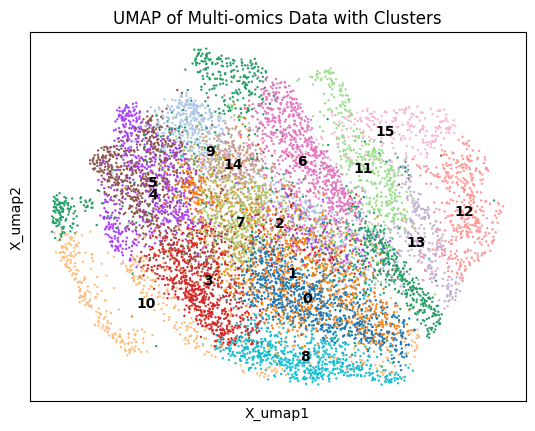

In [20]:
# Visualize
# mu.pl.umap(mdata)

# Visualize with improved labels, coloring by clusters
mu.pl.umap(mdata, color='leiden', legend_loc='on data', legend_fontsize=10, title='UMAP of Multi-omics Data with Clusters', show=True)